# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [22]:
import numpy as np
import pandas as pd
df = pd.read_csv('./fraud_data.csv')

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [23]:
def answer_one():
    Class_total = df['Class'].value_counts().sum()
    Class_1 = df[df > 0].count()
    Sum_no = Class_1.Class.sum()
    percentage_yes =  Sum_no / Class_total
    percentage_yes = percentage_yes * 100
    return percentage_yes
answer_one()

1.6410823768035772

In [24]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [25]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score, accuracy_score
    dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
    y_dummy_predictions = dummy_majority.predict(X_test)
    accuracy_val = accuracy_score(y_test, y_dummy_predictions)
    recall_val = recall_score(y_test, y_dummy_predictions)
    return (accuracy_val, recall_val)
answer_two()

(0.9852507374631269, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [26]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score, accuracy_score
    from sklearn.svm import SVC
    svm = SVC().fit(X_train, y_train)
    svm_pred = svm.predict(X_test)
    accuracy_val_svm = accuracy_score(y_test, svm_pred)
    recall_val_svm = recall_score(y_test, svm_pred)
    precision_val_svm = precision_score(y_test, svm_pred)
    return (accuracy_val_svm, recall_val_svm, precision_val_svm)
answer_three()

(0.9900442477876106, 0.35, 0.9333333333333333)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [27]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC
    svm_new = SVC(C=1e9, gamma=1e-07).fit(X_train, y_train)
    svm_pred_new = svm_new.predict(X_test)
    confusion = confusion_matrix(y_test, svm_pred_new)
    return confusion
answer_four()

array([[5340,    4],
       [  16,   64]], dtype=int64)

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

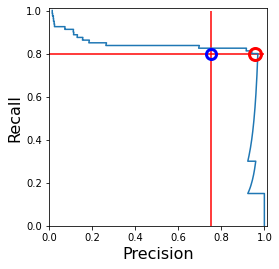

At zero threshold, precision: 0.96, recall: 0.80
Difference (precision - recall): 0.16


(0.8, 0)

In [32]:
def answer_five():       
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import confusion_matrix
    import warnings
    warnings.filterwarnings('ignore')
    
    lr = LogisticRegression().fit(X_train, y_train)
    lr_pred = lr.predict(X_test)
    y_scores = lr.decision_function(X_test)
    
    from sklearn.metrics import precision_recall_curve
    import matplotlib.pyplot as plt
    precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
    closest_zero = np.argmin(np.abs(thresholds))
    closest_zero_p = precision[closest_zero]
    closest_zero_r = recall[closest_zero]
    plt.figure()
    plt.xlim([0.0, 1.01])
    plt.ylim([0.0, 1.01])
    plt.plot(precision, recall, label='Precision-Recall Curve')
    plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
    plt.plot(0.75, closest_zero_r, 'o', markersize=10, fillstyle='none', c='b', mew=3)
    plt.hlines(closest_zero_r, 0, 1, colors='r', linestyles='solid')
    plt.vlines(0.75, 0, 1, colors='r', linestyles='solid')
    plt.xlabel('Precision', fontsize=16)
    plt.ylabel('Recall', fontsize=16)
    plt.axes().set_aspect('equal')
    plt.show()
    print('At zero threshold, precision: {:.2f}, recall: {:.2f}'.format(closest_zero_p, closest_zero_r))
    print('Difference (precision - recall): {:.2f}'.format(closest_zero_p - closest_zero_r))
    TPR_Value = 0
    return (closest_zero_r, TPR_Value)
answer_five()

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array. You might need to reshape your raw result to meet the format we are looking for.*

In [ ]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    # Your code here
    
    return # Return your answer

In [ ]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

#GridSearch_Heatmap(answer_six())